# ***Regresioni modeli***


---





### Učitavanje biblioteka

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import copy
from collections import Counter
from matplotlib import pyplot
from numpy import linalg
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

## *Multivarijantna linearna regresija*

### Učitavanje podataka

In [2]:
url = 'https://raw.githubusercontent.com/zqktlwi4fecvo6ri/Statistics-and-Probability/Stable/winequality-red.csv'
data = pd.read_csv(url)
dataFrame = pd.DataFrame(data)

# Random sample
data.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1486,6.8,0.68,0.21,2.1,0.07,9.0,23.0,0.99546,3.38,0.6,10.3,5


### Podela podataka u trening i test skup

### Linearna regresija

Linearna regresija je jedan od najjednostavnijih modela mašinskog učenja. Zasniva se na mapiranju jedne ili više ulaznih karakteristika ($x$) u izlaznu vrednost ($y$). Naš zadatak će biti da za datih $11$ karakteristika vina ("fixed acidity", "volatile acidity", ...) damo što bolju ocenu kvaliteta.

Rešenje problema proizilazi iz rešenja sledećeg minimizacionog problema:

$$\underset{w}\min||y-Xw||^2 $$

pri čemu $X$ predstavlja matricu redova $x_1, x_2, ..., x_n$ ulaznih karakteristika , $w=[w_0, w_{1}, ..., w_n]^T$ vektor koeficijenata koje treba naučiti, a $y=[y_1, ..., y_n]^T$ izlazni kolona vektor.

Problem sa matričnim rešavanjem datog problema jeste to što u realnim situacijama naša ulazna matrica nije dobro uslovljena, odnosno nije kvadratna i nema svoj inverz. Ispostavlja se da se rešenje datog problema određivanja vektora $w$ leži u narednoj jednakosti:

$$w=(X^TX)^{-1}X^Ty$$

gde je $(X^TX)^{-1}X^T$ izraz koji predstavlja pseudoinverz matrice $X$.

<img src="linearreg.gif" width="500">

In [3]:
class LinearRegression:

    def __init__(self):
      self.weights = 0

    def fit(self, X, y):
      """
      This function fits the line based on the previous linear regression analysis

      Arguments:
      X -- data of size (number of examples, number of features)
      y -- true value for wine quality of size (number of examples)

      Returns:
      self.weights -- calculated weights

      """

      # na 0tom mestu dodaje 1
      X = np.insert(X, 0, 1, axis=1)
      # formula koja je objasnjena gore
      X_exp = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)
      # kako trazimo koeficijente
      self.weights = np.matmul(X_exp, y)
      return self.weights

    def predict(self, x):

      '''
      Predict what is the value of y based on the learned parameter w
      
      Arguments:
      x -- data of size (number of examples, number of features)
      
      Returns:
      y_pred -- a numpy array (vector) containing all predictions for the examples in x
      '''
      # opet na 0tom mestu dodajemo 1
      x = np.insert(x.T, 0, 1, axis=0)
      # pomocu odredjenih koeficijenata izvodimo linearnu transformaciju
      y_pred = np.dot(self.weights.T, x)
      return y_pred

In [4]:
x_lin = data.iloc[:, :-1].values  # uzimamo ficere
y_lin = data.iloc[:, -1].values  # uzimamo kvalitet vina kao labele
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x_lin, y_lin, test_size = 0.2, random_state = 0)

### Kreiranje modela

In [5]:
linear_model = LinearRegression() 
linear_model.fit(x_train_lin, y_train_lin)
pred_lin = linear_model.predict(x_test_lin)

### Evaluacija

In [6]:
MSE = np.square(np.subtract(y_test_lin, pred_lin)).mean() # mean square error
MAPE = np.mean(np.abs((y_test_lin - pred_lin) / y_test_lin)) * 100 # mean absolute percentage error
RMSE =  np.sqrt(MSE) # root mean square error

In [7]:
print("Srednja kvadratna greška (MSE):", np.round(MSE, 4))
print("Koren srednje kvadratne greške (RMSE):", np.round(RMSE, 4))
print("Procentualna srednja apsolutna greška (MAPE):", np.round(MAPE, 4), "%")

Srednja kvadratna greška (MSE): 0.3845
Koren srednje kvadratne greške (RMSE): 0.6201
Procentualna srednja apsolutna greška (MAPE): 8.782 %


## *Logistička regresija*

Logistička regresija zapravo predstavlja klasifikacioni model, iako joj naziv govori drugačije. U ovom delu radionice, bavićemo se klasifikacijom vina na dve vrste u zavisnosti od kvaliteta:

1. "loše" vino - kvalitet ima ocenu od 3 do 6 - klasa 0
2. "dobro" vino - kvalitet ima ocenu veću od 6 - klasa 1

Ono što pokušavamo da rešimo jeste problem: Ako znamo da nam je dat niz ulaznih karakteristika vina, koja je verovatnoća da vino bude dobro? Znamo da je verovatnoća nekog događaja broj koji može uzeti vrednost od $0$ do $1$, pa model iz linearne regresije nije odgovarajući.

### Podela i normalizacija podataka

In [8]:
data_log = data.copy()

# The target variable was updated after the change 3-6 not good wine, 6-8 good wine
data_log["quality"] = 1 * (data_log["quality"] >= 6)

x_log = data_log.iloc[:, :-1].values
y_log = data_log.iloc[:, -1].values
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size = 0.2, random_state = 1)


In [9]:
def dataNormalization(x):
    """
    Standard deviation normalization was performed.
    :param x: x_train
    :return: normalizedValues
    """

    lengthOfSelectedData = len(x)
    sumOfSelectedData = sum(x)
    mean = sumOfSelectedData / lengthOfSelectedData

    average = sum(x) * 1.0 / len(x)
    variance = list(map(lambda x: (x - average) ** 2, x))
    std = (sum(variance) * 1.0 / len(variance)) ** 0.5
    x_train_mean = mean
    x_train_std = std
    normalizedValues = (x - x_train_mean) / x_train_std

    return normalizedValues

In [10]:
x_train_log = dataNormalization(x_train_log).T
x_test_log = dataNormalization(x_test_log).T

### Definisanje pomoćnih funkcija

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1 / (1 + np.exp(-z))
        
    return s

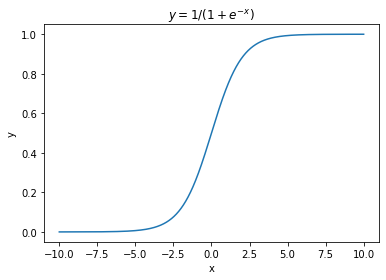

In [12]:
example_x = np.linspace(-10, 10, 10000)
example_sigmoid = sigmoid(example_x)

plt.plot(example_x, example_sigmoid)
plt.ylabel('y')
plt.xlabel('x')
plt.title("$y=1/(1+e^{-x})$")
plt.show()

### Propagacija unapred i unazad

Postupak učenja pri logističkoj regresiji podrazumeva dva koraka koji se ponavljaju: propagaciju unapred (eng. *forward propagation*) i propagaciju unazad (eng. *backpropagation*). Ovaj postupak je praćen ažuriranjem parametara $w$ i $b$ u funkciji za optimizaciju.


Propagacija unapred:
  1. Računamo linearnu funkciju za $i$-ti primer iz obučavajućeg skupa $z^{(i)}=w^Tx^{(i)}+b$
  2. Primenjujemo aktivacionu sigmoid funkciju na dobijeni rezultat te dobijamo $A^{(i)}=\operatorname{sigmoid}(z^{(i)})$.
  3. Računanje funkcije greške:
  $$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

  4. Na kraju dobijamo ukupnu grešku:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Propagacija unazad:

Želimo da poboljšamo naše parametre $w$ i $b$ tako da naš finalni model ima minimalnu grešku. Način na koji definišemo šta je to minimalna greška jeste preko promene greške. U teoriji, negativna logistička vrednost greške $J(w, b)$ ima svoju minimalnu vrednost.

  Da bismo odredili uticaj promene naše greške, računamo gradijente "*cost*" funkcije:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$


In [13]:
def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = - 1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Optimizacija

Za sada smo:
- Inicijalizovali parametre i definisali aktivacionu funkciju
- Odredili cost funkciju i odgovarajuće gradijente

Sada treba ažurirati parametre čije smo gradijente računali. Ideja je da naučimo $w$ i $b$ minimizacijom $J$. Za parametar $\theta$, formula za ažuriranje parametra je $\theta=\theta-\alpha d\theta$, pri čemu je $\alpha$ korak učenja (eng. *learning rate*). 

In [14]:

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 if bad wine, 1 if good wine), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### Predikcija

Način na koji merimo uspešnost svog modela u toku učenja je kroz *cost* funkciju. Ono što takođe možemo uraditi jeste za naučene parametre $w$ i $b$ izvršiti predikciju izlaza $y$, i uporediti to sa tačnim vrednostima kvaliteta vina $y$. Pošto nam sigmoid funkcija vraća vrednost u opsegu od $0$ do $1$, labelu za $i$-ti primer iz obučavajućeg skupa dobijamo na sledeći način: $y_\text{predicted}=0$, ako je $\operatorname{sigmoid}(w^Tx^{(i)}+b) < 0.5$ i $y_\text{predicted}=1$, u suprotnom.

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of size (number of features, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a wine being good
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        
    
    return Y_prediction

### Formiranje i treniranje modela

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """ 

    # initialize parameters with zeros
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0
    
    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [17]:
logistic_regression_model = model(x_train_log, y_train_log, x_test_log, y_test_log, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.646564
Cost after iteration 200: 0.615731
Cost after iteration 300: 0.594689
Cost after iteration 400: 0.579844
Cost after iteration 500: 0.569040
Cost after iteration 600: 0.560955
Cost after iteration 700: 0.554755
Cost after iteration 800: 0.549898
Cost after iteration 900: 0.546021
Cost after iteration 1000: 0.542875
Cost after iteration 1100: 0.540285
Cost after iteration 1200: 0.538123
Cost after iteration 1300: 0.536299
Cost after iteration 1400: 0.534744
Cost after iteration 1500: 0.533405
Cost after iteration 1600: 0.532242
Cost after iteration 1700: 0.531226
Cost after iteration 1800: 0.530330
Cost after iteration 1900: 0.529537
train accuracy: 74.27677873338546 %
test accuracy: 76.25 %


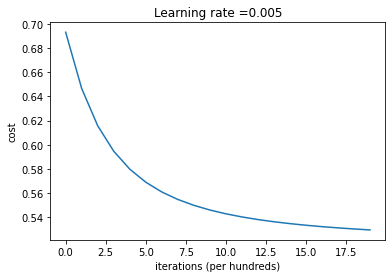

In [18]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

### Ispitivanje različitih hiperparametara

Training a model with learning rate: 0.1

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



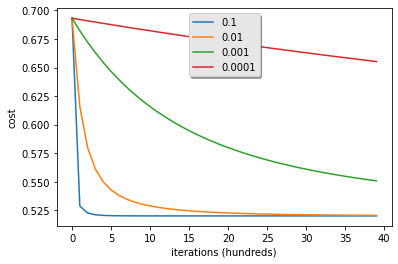

In [19]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(x_train_log, y_train_log, x_test_log, y_test_log, num_iterations=4000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()